In [1]:
import geopandas as gpd
from matplotlib import pyplot as plt
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
regions = {'Hong Kong Island': ['Central and Western',
                                'Wan Chai',
                                'Eastern',
                                'Southern'],
           'Kowloon East': ['Wong Tai Sin',
                            'Kwun Tong'],
           'Kowloon West': ['Yau Tsim Mong',
                            'Sham Shui Po',
                            'Kowloon City'],
           'New Territories East': ['North',
                                    'Tai Po',
                                    'Sha Tin',
                                    'Sai Kung'],
           'New Territories West': ['Kwai Tsing',
                                    'Tsuen Wan',
                                    'Tuen Mun',
                                    'Yuen Long',
                                    'Islands']}
regions_map = {v: k for k, vs in regions.items() for v in vs}
data_path = "data/DCCA_21C.json"
yoshinoya_file = "data/yoshinoya.json"

In [3]:
dcca_raw = gpd.read_file(data_path).to_crs(epsg=4326)
dcca = dcca_raw[['dcca', 'dc_eng', 't_pop', 'geometry']]
dcca.rename(columns={'dcca': 'id'}, inplace=True)
dcca['region'] = dcca.dc_eng.apply(lambda k: regions_map[k])
dcca

,id,dc_eng,t_pop,geometry,region
0,1101,Central and Western,11077,"POLYGON ((114.16744 22.28321, 114.16742 22.283...",Hong Kong Island
1,1102,Central and Western,15464,"POLYGON ((114.15568 22.27649, 114.15634 22.276...",Hong Kong Island
2,1103,Central and Western,19279,"POLYGON ((114.15103 22.28218, 114.15046 22.282...",Hong Kong Island
3,1104,Central and Western,19202,"POLYGON ((114.15184 22.27684, 114.14969 22.278...",Hong Kong Island
4,1105,Central and Western,18548,"POLYGON ((114.14538 22.28385, 114.14538 22.284...",Hong Kong Island
...,...,...,...,...,...
447,3906,Islands,17546,"MULTIPOLYGON (((113.93774 22.29069, 113.93790 ...",New Territories West
448,3907,Islands,19336,"POLYGON ((114.05545 22.31290, 114.01046 22.313...",New Territories West
449,3908,Islands,6282,"MULTIPOLYGON (((114.03308 22.25879, 114.03306 ...",New Territories West
450,3909,Islands,6724,"MULTIPOLYGON (((114.25092 22.16131, 114.25087 ...",New Territories West


In [3]:
url = "https://nominatim.openstreetmap.org/search?street=Yoshinoya&city=Hong+Kong+SAR&limit=50&accept-language=en"
yoshinoya_file = "data/yoshinoya.json"
os.system(f'wget "{url}&format=geojson" -O {yoshinoya_file}')

--2023-04-13 17:15:46--  https://nominatim.openstreetmap.org/search?street=Yoshinoya&city=Hong+Kong+SAR&limit=50&accept-language=en&format=geojson
Resolving nominatim.openstreetmap.org (nominatim.openstreetmap.org)... 130.117.76.5
Connecting to nominatim.openstreetmap.org (nominatim.openstreetmap.org)|130.117.76.5|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/json]
Saving to: ‘data/yoshinoya.json’

     0K ........                                               75.3M=0s

2023-04-13 17:15:47 (75.3 MB/s) - ‘data/yoshinoya.json’ saved [8682]



0

In [4]:
yoshinoya = gpd.read_file(yoshinoya_file).to_crs(epsg=4326)
yoshinoya = yoshinoya[yoshinoya.importance > 0.1]
yoshinoya

,place_id,osm_type,osm_id,display_name,place_rank,category,type,importance,icon,geometry
0,70978872,node,6734390141,"Yoshinoya, 30, Harbour Road, Wan Chai North, W...",30,amenity,fast_food,0.31001,https://nominatim.openstreetmap.org/ui/mapicon...,POINT (114.17712 22.28032)
1,43765701,node,3667331034,"Yoshinoya, Wan Chai Road, Morrison Hill, Wan C...",30,amenity,fast_food,0.31001,https://nominatim.openstreetmap.org/ui/mapicon...,POINT (114.17703 22.27697)
2,54916739,node,4858618222,"Yoshinoya, Lockhart Road, East Point, Causeway...",30,amenity,fast_food,0.31001,https://nominatim.openstreetmap.org/ui/mapicon...,POINT (114.18290 22.28071)
3,12361383,node,1299465480,"Yoshinoya, King's Road, Fortress Hill, North P...",30,amenity,fast_food,0.31001,https://nominatim.openstreetmap.org/ui/mapicon...,POINT (114.19455 22.28911)
4,27979826,node,2773486346,"Yoshinoya, Tsat Tsz Mui Road, Tsat Tsz Mui, No...",30,amenity,fast_food,0.31001,https://nominatim.openstreetmap.org/ui/mapicon...,POINT (114.20445 22.29152)
5,1171343,node,339050630,"Yoshinoya, 57-87, Shau Kei Wan Road, Kornhill,...",30,amenity,fast_food,0.31001,https://nominatim.openstreetmap.org/ui/mapicon...,POINT (114.22150 22.28292)
6,49358819,node,4383606689,"Yoshinoya, Des Voeux Road Central, SoHo, Sheun...",30,amenity,fast_food,0.31001,https://nominatim.openstreetmap.org/ui/mapicon...,POINT (114.15351 22.28602)
7,17049044,node,1952089995,"Yoshinoya, Connaught Road Central, Government ...",30,amenity,fast_food,0.31001,https://nominatim.openstreetmap.org/ui/mapicon...,POINT (114.15770 22.28300)
8,54743484,node,4862113238,"Yoshinoya, Des Voeux Road West, Shek Tong Tsui...",30,amenity,fast_food,0.31001,https://nominatim.openstreetmap.org/ui/mapicon...,POINT (114.13668 22.28696)
9,62217455,node,5740310042,"Yoshinoya, 5, Nam Ning Street, Shek Pai Wan, A...",30,amenity,fast_food,0.31001,https://nominatim.openstreetmap.org/ui/mapicon...,POINT (114.15381 22.24818)


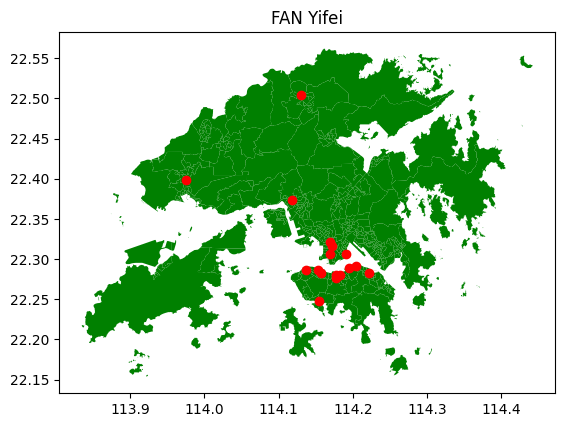

In [6]:
fig,ax = plt.subplots()
dcca.plot(ax=ax,color='green')
yoshinoya.plot(ax=ax,color='red')
plt.title('FAN Yifei')
plt.show()

In [8]:
def display_target_region(ax,target_region = 'New Territories West',points = yoshinoya, geodf = dcca):
    geodf_selected = geodf[geodf.region == target_region]
    isin_target_region = points.apply(lambda item: geodf_selected.contains(item.geometry).any(), axis=1)
    geodf_selected.plot(ax=ax,color='green')
    points[isin_target_region].plot(ax=ax,color='red')

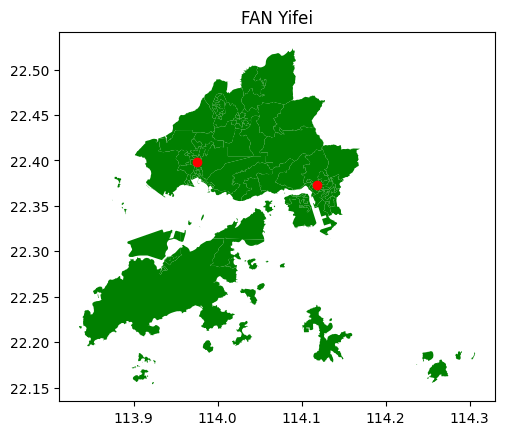

In [9]:
fig,ax = plt.subplots()
display_target_region(ax,target_region = 'New Territories West')
plt.title('FAN Yifei')
plt.show()